Functions

In [165]:

import numpy as np
import  matplotlib.pyplot as plt
from tqdm import trange
import math 


def FreeDiffusionParticle(x0,sigma,dt,jSteps,N): 

    x=np.zeros((jSteps+1,N))
    x[0,:]=x0
    for j in range (jSteps):
        plusOrMinusMatrix=np.random.randint(2,size=(1,N))*2 -1
        x[j+1,:]=x[j,:]+plusOrMinusMatrix*(sigma*np.sqrt(dt))
    return x[jSteps,:]

def DiffusionParticleInBox(L,x0,sigma0,dt,jSteps,N,dSigma,alpha,functionXNext): 
    xNext=np.ones((1,N))*x0
    for j in trange (jSteps):
        xNext=functionXNext(N,xNext,dt,sigma0,dSigma,L,alpha)
        xNext=np.where(xNext < -L/2,  -L-xNext,xNext)
        xNext=np.where(xNext > L/2, L-xNext, xNext)
    return xNext

def DiffusionParticleInBoxOneParticle(L,x0,sigma0,dt,jSteps,N,dSigma,alpha,functionXNext): 
    x=np.zeros((jSteps+1,1))
    x[0]=x0
    xNext=x0
    for j in trange (jSteps):
        xNext=functionXNext(1,xNext,dt,sigma0,dSigma,L,alpha)
        xNext=np.where(xNext < -L/2,  -L-xNext,xNext)
        xNext=np.where(xNext > L/2, L-xNext, xNext)
        x[j+1]=xNext
    return x

def PlotAndInitlizeParticles(L,dL,sigma0,dt,n,N,dSigma,alpha,functionXNext,functionDiff):
    yDrift=np.zeros((math.ceil(L/dL),1))
    k=0
    for lLower in trange(int(-L/2),int(L/2),int(dL)):
        x0s=np.random.uniform(lLower,lLower+dL,size=N)
        diff=0
        for x0 in x0s:
            diff=diff+DiffDiffusioParticlenNsteps(L,x0,sigma0,dt,n,N,dSigma,alpha,functionXNext,functionDiff)
        yDrift[k]=(diff/(len(x0s)*n*dt))
        k=k+1
    xPositions=(np.arange(len(yDrift))*dL)-L/2
    plt.plot(xPositions,yDrift,'o')
    plt.show()

def DiffDiffusioParticlenNsteps(L,x0,sigma0,dt,n,N,dSigma,alpha,functionXNext,functionDiff):
    xNext=x0
    for j in range (n):
        xNext=functionXNext(N,xNext,dt,sigma0,dSigma,L,alpha)
        xNext=np.where(xNext < -L/2,  -L-xNext,xNext)
        xNext=np.where(xNext > L/2, L-xNext, xNext)
    return functionDiff(xNext,x0)


def PlotMeasurments(x,L,dL,n,dt,function):
    yDrift=np.zeros((math.floor(L/dL),1))
    k=0
    for lLower in trange(int(-L/2),int(L/2-dL),int(dL)):
        diff=0
        nInRange=0
        for i in range (len(x)-n):
            if  lLower<=x[i]<=lLower+dL:
                diff=diff+function(x,i,n)
                nInRange=nInRange+1
        if nInRange!=0:
            yDrift[k]=diff/(nInRange*n*dt)
        else :
            yDrift[k]=0
            print("No particles that are in this range are found ["+str(lLower)+','+str(lLower+dL)+"]")
        k+=1

    xPositions=(np.arange(len(yDrift))*dL)-L/2
    plt.plot(xPositions,yDrift,'o')
    plt.show()

def ConstantNoise(N,x,dt,sigma0,dSigma,L,alpha):
    plusOrMinusVector=np.random.randint(2,size=(1,N))*2 -1
    return x+plusOrMinusVector*np.sqrt(dt)*(sigma0)

def MultiplicativeNoise(N,x,dt,sigma0,dSigma,L,alpha):
    plusOrMinusVector=np.random.randint(2,size=(1,N))*2 -1
    sigmaX=(dSigma/L)*x+sigma0
    return x+plusOrMinusVector*np.sqrt(dt)*(sigmaX)

def StochasticIntergral(N,x,dt,sigma0,dSigma,L,alpha):
    plusOrMinusVector=np.random.randint(2,size=(1,N))*2 -1
    sigmaX=(dSigma/L)*x+sigma0
    dSigmaX=dSigma/L
    return x  +  alpha*sigmaX*dSigmaX*dt   +  plusOrMinusVector*sigmaX*np.sqrt(dt) 

def Drift(x,i,n):
    return (x[i]-x[i+n])
def Drift2(xjn,xj):
    return (xjn-xj)
def BiasedDiffusion2(xjn,xj):
    return (xjn-xj)**2/2

def BiasedDiffusion(x,i,n):
    return ((x[i]-x[i+n])**2)/2

    


def CreatePlots(times,L,x0,sigma,dt,N,dSigma,alpha,func,functionXNext):
    nTimes=len(times)
    plt.figure(figsize=(15, 10))
    for i in range(nTimes):
        time=times[i]
        jSteps=int(time/dt)
        data=func(L,x0,sigma,dt,jSteps,N,dSigma,alpha,functionXNext)
        PlotHistogram(data,str(time))
    plt.legend()
    plt.show()




def CalculateMeanAndSigma(data):
    mean=np.mean(data)
    variance=np.std(data)
    #todo ACalculate variance
    
    return mean, variance



def PlotHistogram(data,strLabel):
    #ax.hist(data,20)
    
    l = np.arange(100)-50
    hist = np.histogram(data,l)
    plt.plot(hist[1][:-1]+1/2,hist[0],'o',label=strLabel)
    plt.xlim(-50,-35)



7.1

Mean is = 12.715 and shold be = 12
  Standard deviation is = 31.481 and should be = 31.623


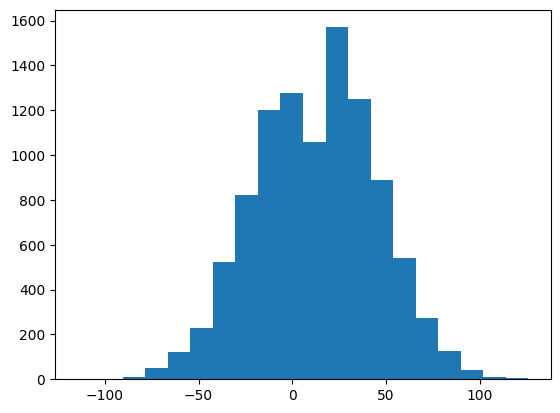

In [163]:
x0=12
sigma=10
dt=0.1
jSteps=100
endPositions=FreeDiffusionParticle(x0,sigma,dt,jSteps,10**4)
mean,std=CalculateMeanAndSigma(endPositions)
print('Mean is = '+str(round(mean,3))+ ' and shold be = '+str(x0)+ '\n  Standard deviation is = '+str(round(std,3))+ ' and should be = ' +str(round(sigma*np.sqrt(jSteps*dt),3)))
plt.hist(endPositions,20)
plt.show()

7.2

100%|██████████| 10000000/10000000 [13:10<00:00, 12652.88it/s]


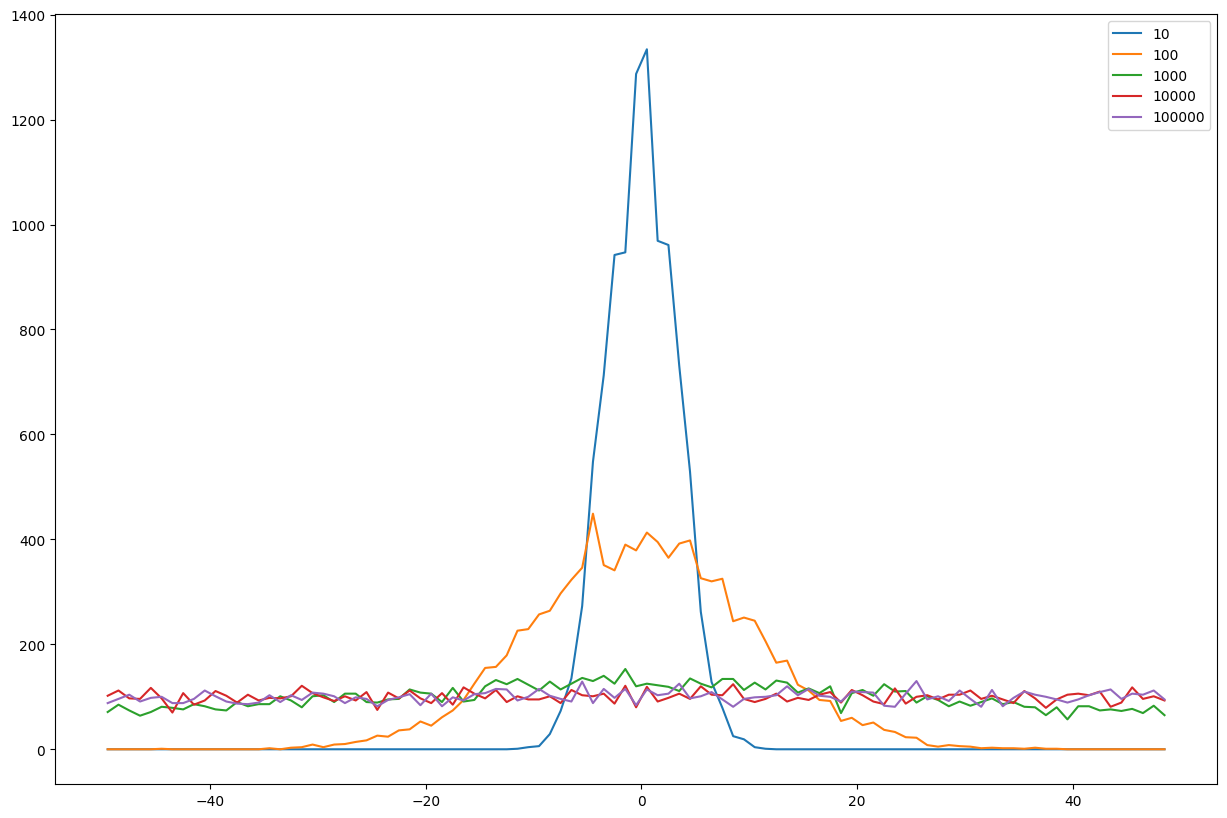

In [164]:
L=100
x0=0
sigma=1
dt=0.01
N=10**4
times=np.array([10,10**2,10**3,10**4,10**5])
dSigma=0
#CreatePlots(times,L,x0,sigma,dt,N,dSigma,DiffusionParticleInBox)
CreatePlots(times,L,x0,sigma,dt,N,dSigma,0,DiffusionParticleInBox,MultiplicativeNoise)

7.3

100%|██████████| 10000000/10000000 [13:06<00:00, 12720.94it/s]


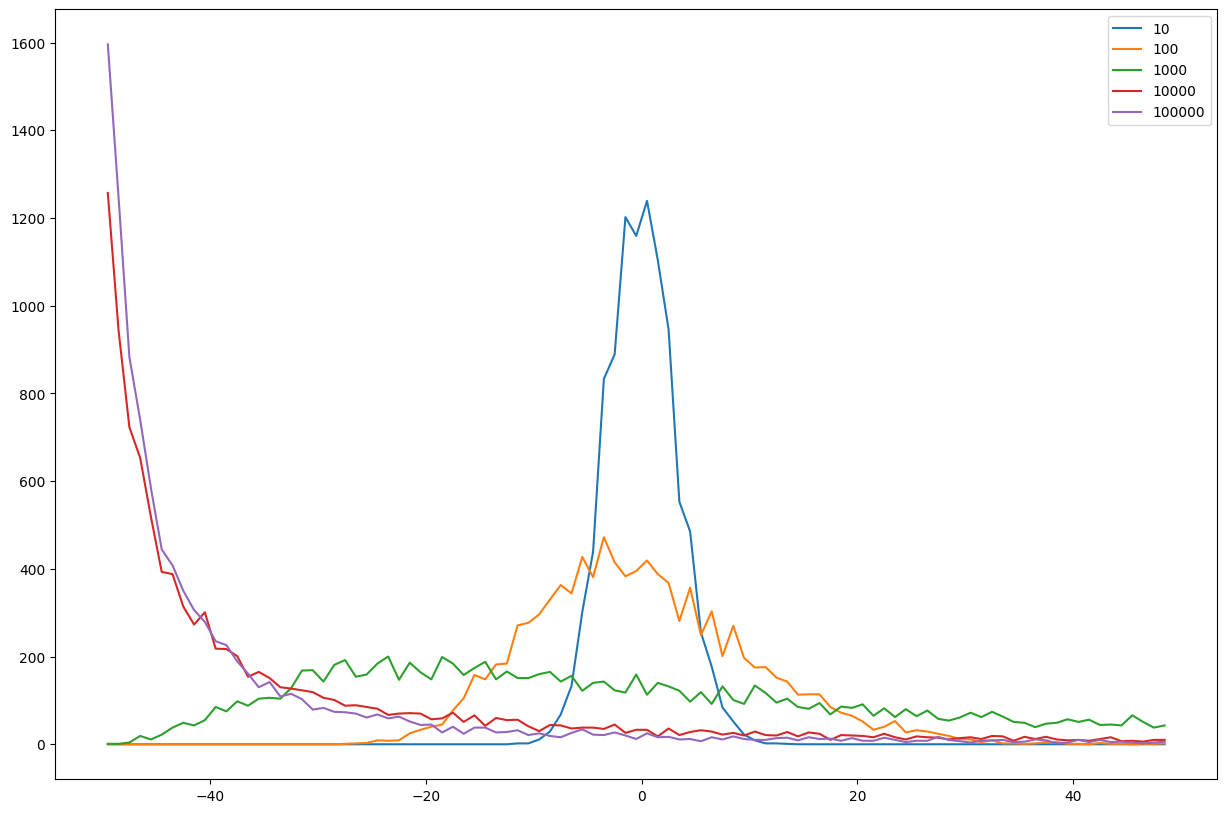

In [165]:
L=100
x0=0
sigma=1
dt=0.01
N=10**4
times=np.array([10,10**2,10**3,10**4,10**5])
dSigma=1.8
#CreatePlots(times,L,x0,sigma,dt,N,dSigma,DiffusionParticleInBox)
CreatePlots(times,L,x0,sigma,dt,N,dSigma,0,DiffusionParticleInBox,MultiplicativeNoise)

7.4

100%|██████████| 10000000/10000000 [14:44<00:00, 11307.97it/s]


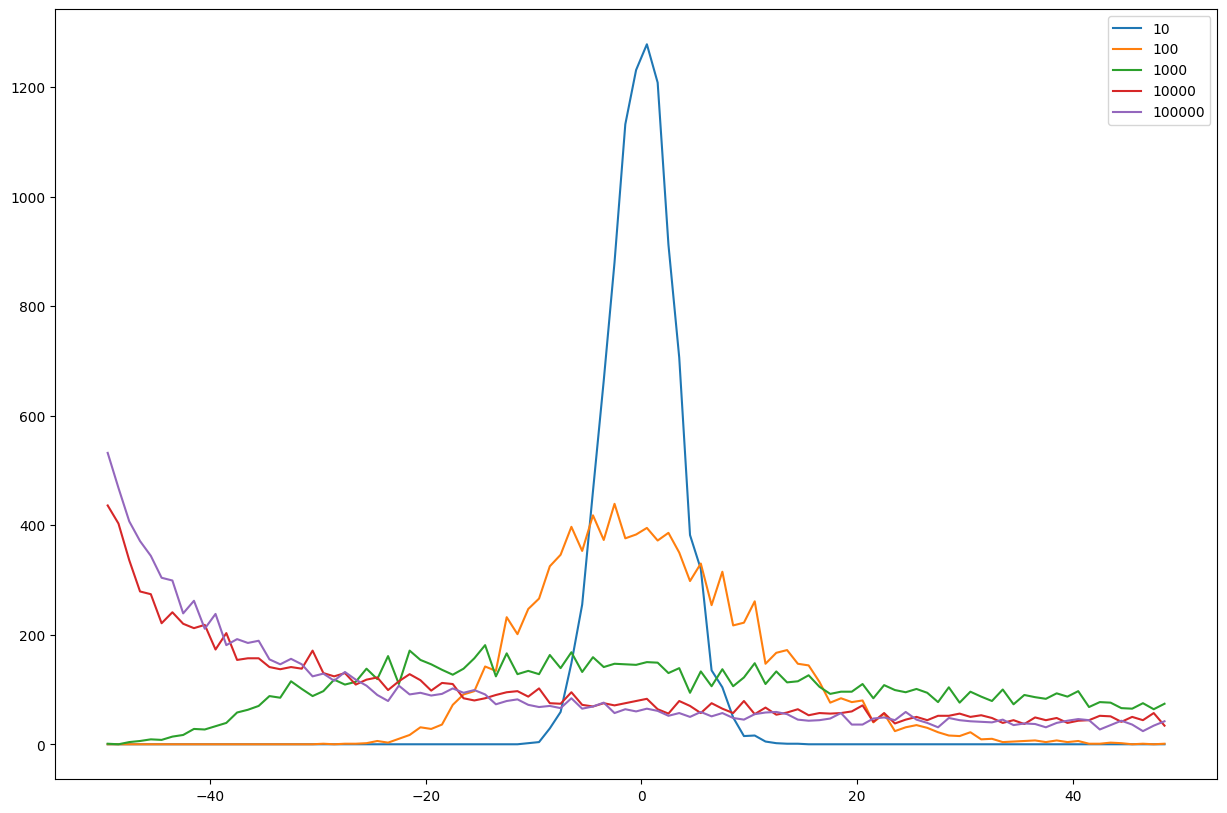

100%|██████████| 10000000/10000000 [14:46<00:00, 11277.96it/s]


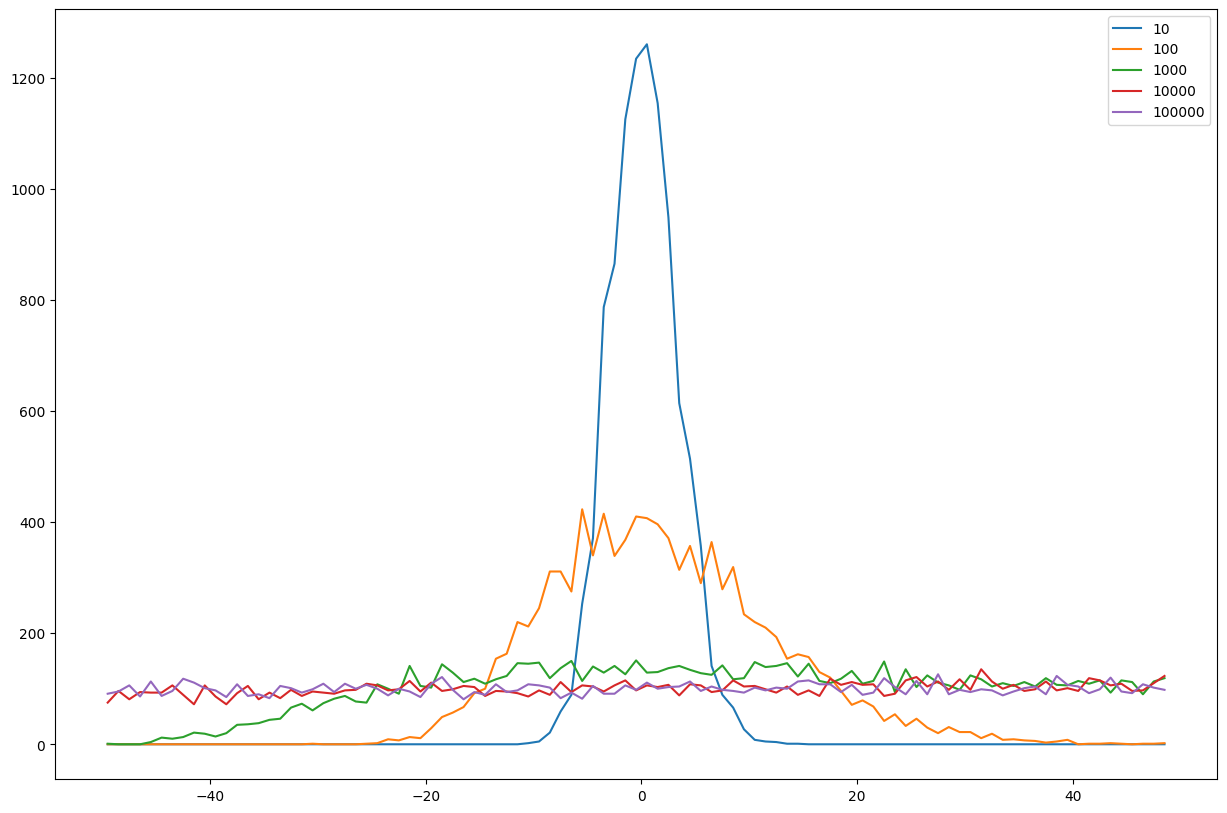

In [166]:
L=100
x0=0
sigma=1
dt=0.01
N=10**4
times=np.array([10,10**2,10**3,10**4,10**5])
dSigma=1.8
CreatePlots(times,L,x0,sigma,dt,N,dSigma,0.5,DiffusionParticleInBox,StochasticIntergral)
CreatePlots(times,L,x0,sigma,dt,N,dSigma,1,DiffusionParticleInBox,StochasticIntergral)

7.6

  0%|          | 0/10000000 [00:00<?, ?it/s]

100%|██████████| 33/33 [09:03<00:00, 16.46s/it]


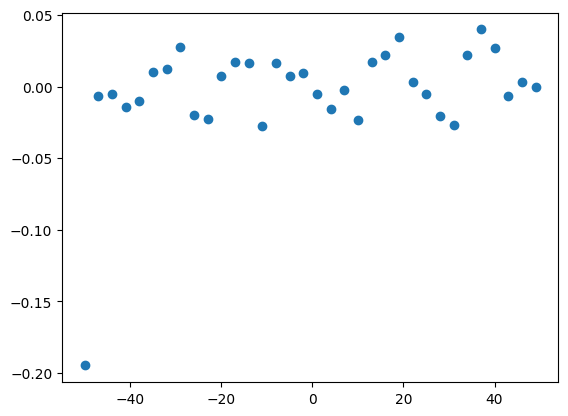

In [3]:
import math 
jSteps=10**7
L=100
x0=0
sigma0=1
dt=0.01
dSigma=0
alpha=0
x=DiffusionParticleInBoxOneParticle(L,x0,sigma0,dt,jSteps,1,dSigma,alpha,MultiplicativeNoise)

dL=3
yDrift=np.zeros((math.ceil(L/dL),1))
k=0
n=10
for L in trange(int(-L/2),int(L/2-dL),int(dL)):
    indexParticlesInRange=[i for i in range(len(x)-n) if L<=x[i]<=L+dL]
    #indexParticlesInRange=np.where(L<=x<=L+dL)[0]
    diffDrift=0
    for j in indexParticlesInRange:
        diffDrift=diffDrift+(x[j]-x[j+n])/len(indexParticlesInRange)
    yDrift[k]=diffDrift/(n*dt)
    k+=1

xPositions=np.arange(len(yDrift))*dL
plt.plot(xPositions-50,yDrift,'o')
plt.show()


In [75]:
xConstantDiffusion1=x

In [62]:

jSteps=10**7
L=100
x0=0
sigma0=1
dt=0.01
dSigma=0
alpha=0
x1=DiffusionParticleInBoxOneParticle(L,x0,sigma0,dt,jSteps,1,dSigma,alpha,MultiplicativeNoise)


100%|██████████| 1000000/1000000 [00:22<00:00, 44152.74it/s]


100%|██████████| 33/33 [08:52<00:00, 16.13s/it]


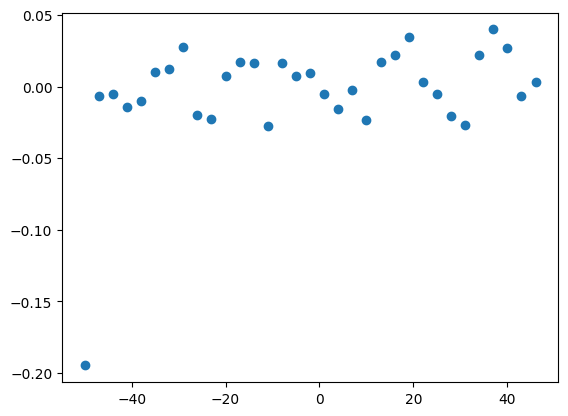

In [65]:
dL=3
n=10
PlotMeasurments(x,L,dL,n,dt,Drift)


  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 33/33 [09:13<00:00, 16.78s/it]


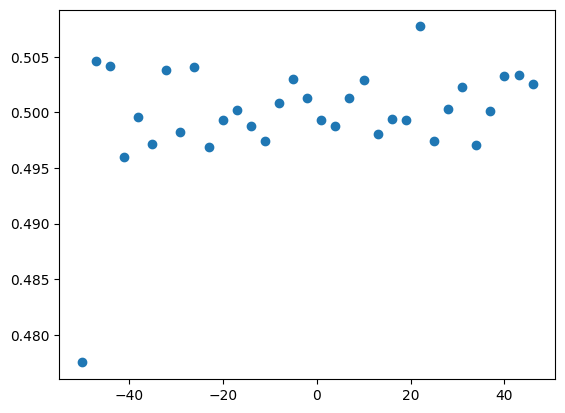

In [78]:
dL=3
n=10
PlotMeasurments(xConstantDiffusion1,L,dL,n,dt,BiasedDiffusion)

My own implementation 7.6

100%|██████████| 50/50 [00:00<00:00, 370.44it/s]


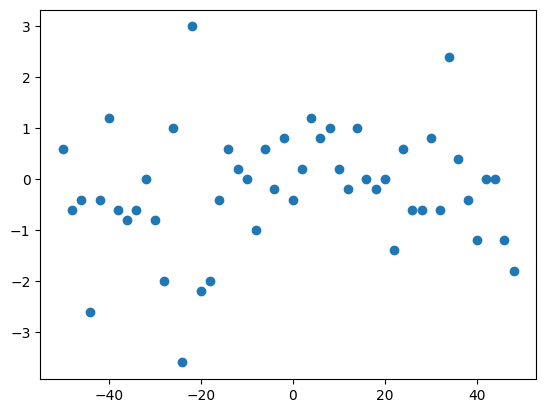

In [166]:
jSteps=10**6
L=100
x0=0
sigma0=1
dt=0.01
dSigma=0
alpha=1
N=10
dL=2
n=10
PlotAndInitlizeParticles(L,dL,sigma0,dt,n,N,dSigma,alpha,ConstantNoise,Drift2)


100%|██████████| 50/50 [00:01<00:00, 34.77it/s]


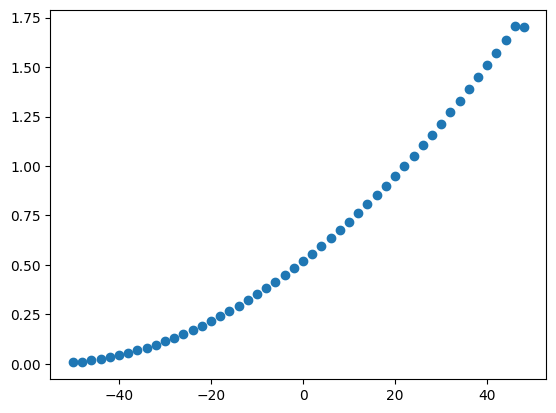

In [151]:
jSteps=10**6
L=100
x0=0
sigma0=1
dt=0.01
dSigma=1.8
alpha=1
N=1000
dL=2
n=1
PlotAndInitlizeParticles(L,dL,sigma0,dt,n,N,dSigma,alpha,MultiplicativeNoise,BiasedDiffusion2)

In [67]:
jSteps=10**7
L=100
x0=0
sigma0=1
dt=0.01
dSigma=1.8
alpha=1
N=1
x2=DiffusionParticleInBoxOneParticle(L,x0,sigma0,dt,jSteps,N,dSigma,alpha,StochasticIntergral)




100%|██████████| 10000000/10000000 [04:26<00:00, 37470.84it/s]


In [76]:
xMultipleNoise2=x2

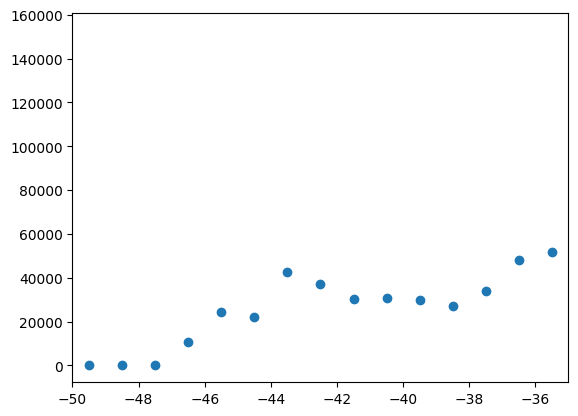

In [77]:
PlotHistogram(xMultipleNoise2,'hej')

  3%|▎         | 1/33 [00:02<01:08,  2.15s/it]

No particles that are in this range are found [-50,-47]


  6%|▌         | 2/33 [00:04<01:06,  2.13s/it]

No particles that are in this range are found [-47,-44]


  9%|▉         | 3/33 [00:06<01:03,  2.13s/it]

No particles that are in this range are found [-44,-41]


 12%|█▏        | 4/33 [00:08<01:01,  2.12s/it]

No particles that are in this range are found [-41,-38]


 15%|█▌        | 5/33 [00:10<00:59,  2.11s/it]

No particles that are in this range are found [-38,-35]


100%|██████████| 33/33 [00:58<00:00,  1.76s/it]


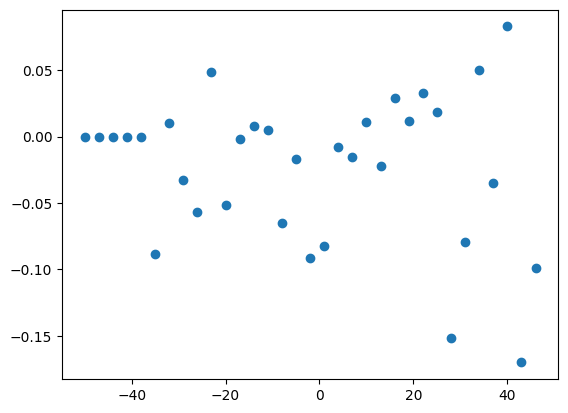

In [49]:
dL=3
n=10
PlotMeasurments(x2,L,dL,n,dt,Drift)


In [ ]:
dL=3
n=10
PlotMeasurments(x2,L,dL,n,dt)

In [ ]:
jSteps=10**6
L=100
x0=0
sigma0=1
dt=0.01
dSigma=0
alpha=0
x1=DiffusionParticleInBoxOneParticle(L,x0,sigma0,dt,jSteps,1,dSigma,alpha,MultiplicativeNoise)

In [168]:
x0=12
sigma=10
dt=0.1

endPositions=FreeDiffusionParticle(x0,sigma,dt,jSteps,10**4)
mean,std=CalculateMeanAndSigma(endPositions)
x=DiffusionParticleInBox(L,x0,sigma,dt,jSteps,N,dSigma,0,MultiplicativeNoise)
n=10
print(np.shape(x))
C=np.zeros((1,100))
xP=np.array(range(100))
for n in  range(1,100):
    meanCalc=np.mean(x[0+n,:]- x[0,:])
    C[0,n]= (1/(n*dt))*meanCalc 
print(C)
plt.plot(xP,C)
plt.show()

: 